In [1]:
import meshio

msh = meshio.read('./mesh/synapse.msh')
# pruning the z coordinate to transform into a true 2D and not only pseudo 2D mesh
no_dims = 2
pts = msh.points[:, :no_dims]
msh_io = meshio.Mesh(
    points=pts,
    cells={
        'triangle': msh.cells_dict['triangle'],
    },
)
meshio.write("synapse.xdmf", msh_io)


boundaries = meshio.Mesh(
    points=pts,
    cells={
        'line': msh.cells_dict['line'],
    },
    cell_data={
        'subdomains': [
            msh.cell_data_dict['gmsh:physical']['line'],
        ],
    },
)
meshio.write("boundaries.xdmf", boundaries)

subdomains = meshio.Mesh(
    points=pts,
    cells={
        'triangle': msh.cells_dict['triangle'],
    },
    cell_data={
        'subdomains': [
                msh.cell_data_dict['gmsh:physical']['triangle'],
        ]
    },
)
meshio.write("subdomains.xdmf", subdomains)

1
2


In [57]:
from dolfin import *

In [58]:
#mesh = Mesh("synapse.xml")
mesh = Mesh()
with XDMFFile("synapse.xdmf") as infile:
    infile.read(mesh)

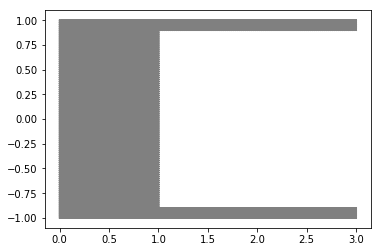

In [59]:
% matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
plt.figure()
plot(mesh)
plt.show()

In [60]:
subdomain_fn = MeshFunction('size_t', mesh, mesh.topology().dim(), value=0)
with XDMFFile("subdomains.xdmf") as subdomain_file:
    subdomain_file.read(subdomain_fn)

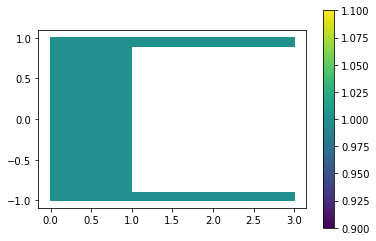

In [61]:
fig = plot(subdomain_fn)
plt.colorbar(fig)
plt.show()

In [63]:
boundary_collection = MeshValueCollection('size_t', mesh, mesh.topology().dim()-1)
with XDMFFile("boundaries.xdmf") as boundary_file:
    boundary_file.read(boundary_collection)
boundaries = MeshFunction('size_t', mesh, boundary_collection)

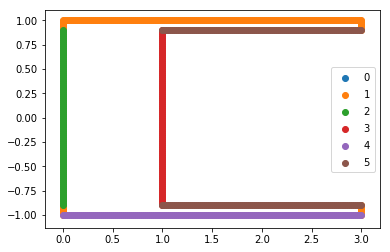

In [82]:
plt.figure()
for i in range(6):
    submesh = MeshView.create(boundaries, i)
    plt.scatter(*submesh.coordinates().T, label=r"$"+str(i)+"$")
plt.legend()
plt.show()

In [54]:
File("bc_subdomains.pvd") << boundaries
#File("subdomains.pvd") << subdomains

In [55]:
len(mesh.coordinates())

7369

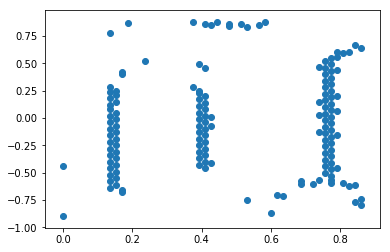

In [32]:
from neuralthreesome import meshprocessing as mp
from pathlib import Path

In [34]:
inpath = "../resources/synapse.geo"
outpath = "./synapse.h5"
mp.geo2hdf(inpath, outpath)

AssertionError: 